<h1>1. Выбор данных</h1>

Abalone Data Set - http://archive.ics.uci.edu/ml/datasets/Abalone


<h1>2. Импорт библиотек</h1>

In [2]:
# Импортируем необходимые библиотеки для анализа данных

# Библиотеки работы с данными
import pandas as pd
import numpy as np

# Библиотки визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка графиков
# plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams.update({'font.size': 18})

# Библиотека машинного обучения
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<h1>3. Описание данных</h1>

Предсказание возраста моллюска по физическим измерениям. Возраст моллюска определяется путем разрезания раковины через конус, окрашивания ее и подсчета количества колец под микроскопом - скучная и трудоемкая задача. Другие измерения, которые легче получить, используются для прогнозирования возраста. Для решения проблемы может потребоваться дополнительная информация, такая как погодные условия и местоположение (следовательно, наличие продуктов питания).

**Название / Тип Данных / Единица измерения / Описание**

* Sex - Пол / номинальный / -- / M (мужчина), F (женщина) и I (младенец)
* Length - Длина / непрерывная / мм / Измерение самой длинной оболочки
* Diameter - Диаметр / непрерывный / мм / перпендикулярный длине
* Height - Высота / непрерывная / мм / с мясом в скорлупе
* Whole_weight - Весь вес / непрерывный / грамм / целое морское ушко
* Shucked_weight - Очищенный вес / непрерывный / грамм / вес мяса
* Viscera_weight - Вес внутренних органов / непрерывный / грамм / вес кишечника (после кровотечения)
* Shell_weight - Вес скорлупы / непрерывный / грамм / после сушки
* Rings - Кольца / целое число / -- / +1.5 дает возраст в годах

In [3]:
# Импортируем данные
names = [
    'Sex', 'Length', 'Diameter',
    'Height', 'Whole_weight', 'Shucked_weight',
    'Viscera_weight', 'Shell_weight', 'Rings'
]

df = pd.read_csv('abalone.csv', names=names)
df.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


<Axes: >

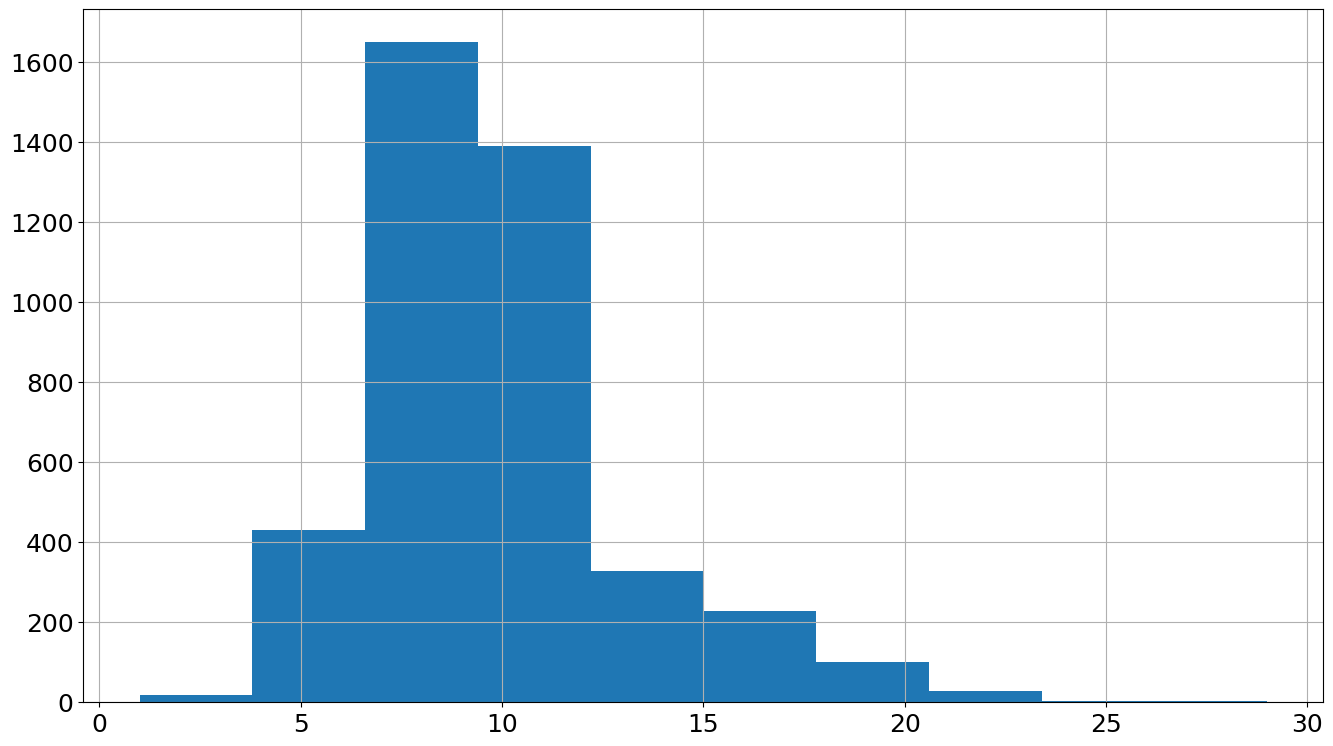

In [4]:
df.Rings.hist()

In [5]:
df.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<h1>4. Подготовка данных</h1>

In [6]:
df.info() # пропущенных данных нет; неверно интерпретирвоанных данных нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


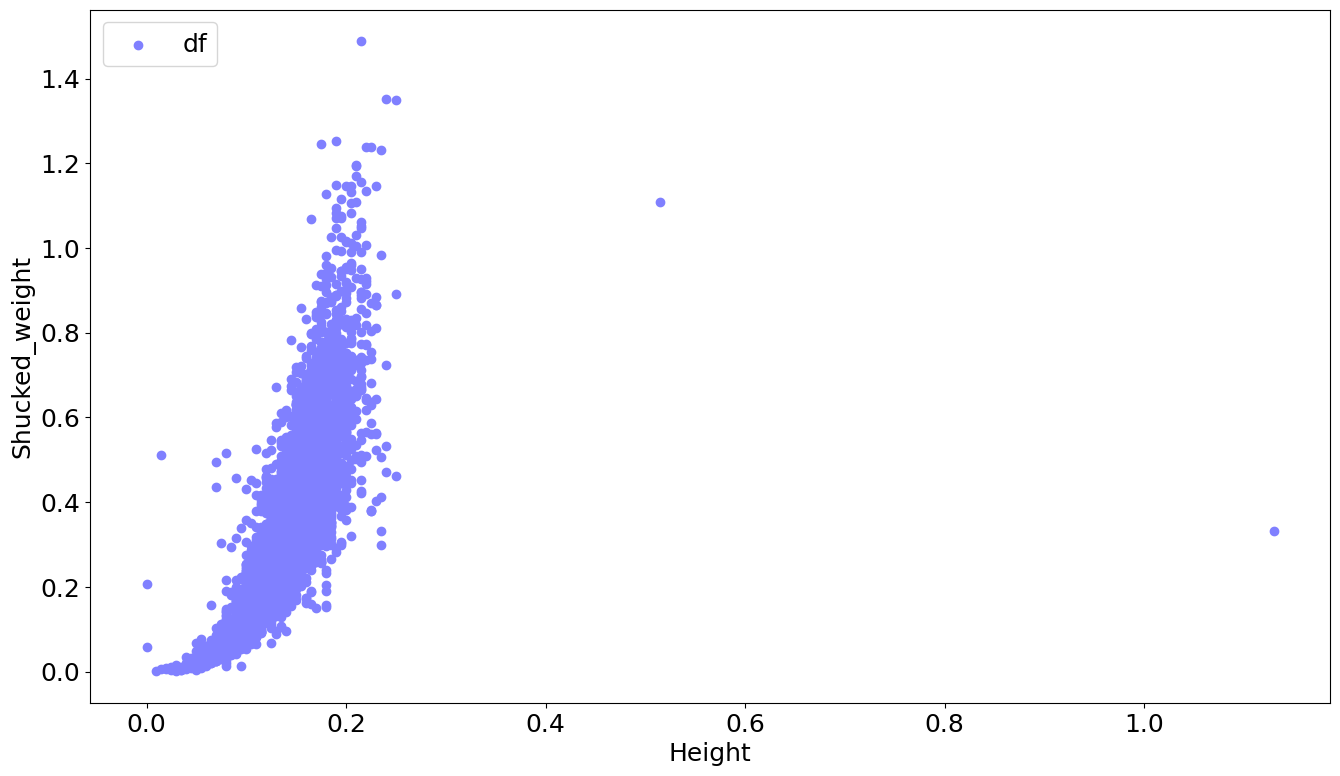

In [7]:
fig, ax = plt.subplots()
ax.scatter(df.Height, df.Shucked_weight, label='df', c='#8080ff')
ax.set_xlabel('Height')
ax.set_ylabel('Shucked_weight')
plt.legend(loc='upper left')

Видно, что имеется два выброса в тестовой выборке - удалим их

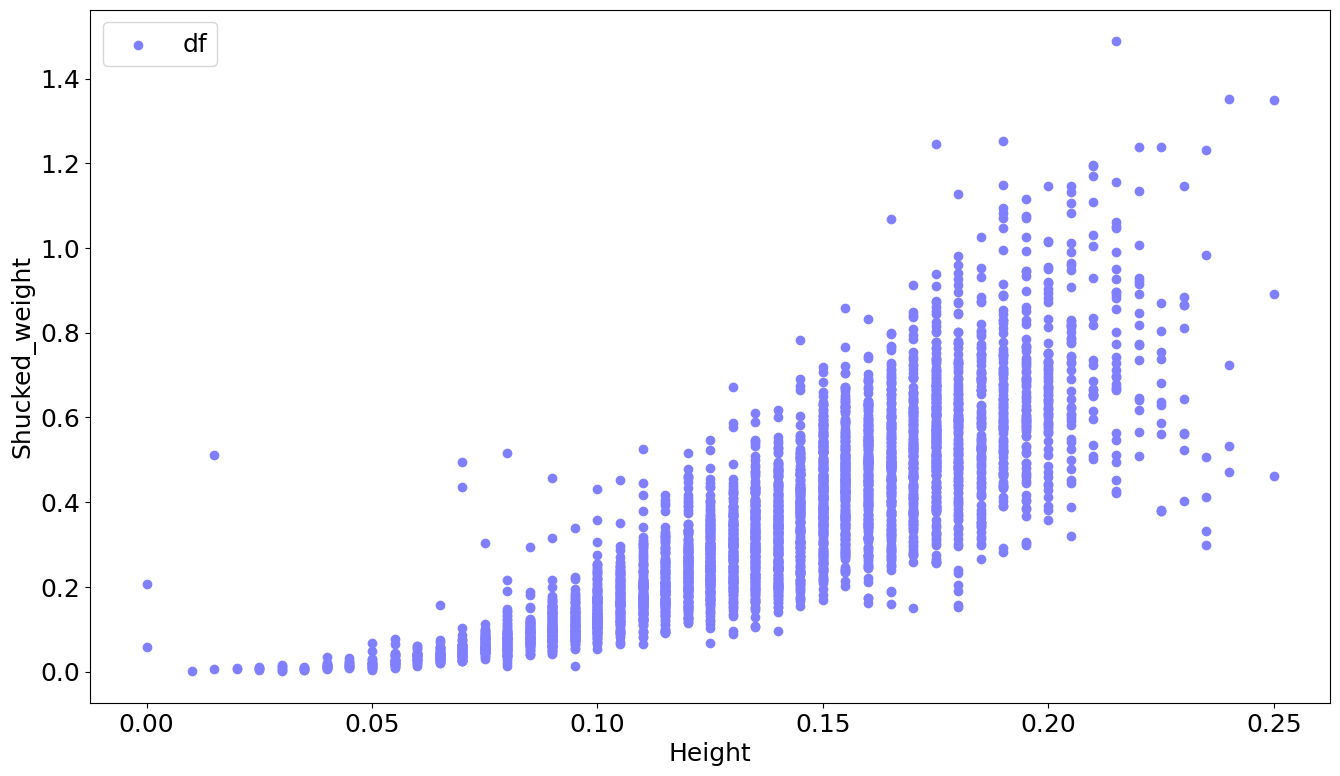

In [20]:
df = df.drop(index=list(df.query("Height>0.4").index))

fig, ax = plt.subplots()
ax.scatter(df.Height, df.Shucked_weight, label='df', c='#8080ff')
ax.set_xlabel('Height')
ax.set_ylabel('Shucked_weight')
plt.legend(loc='upper left')

<h1>5. Матрица корреляции</h1>

<Axes: >

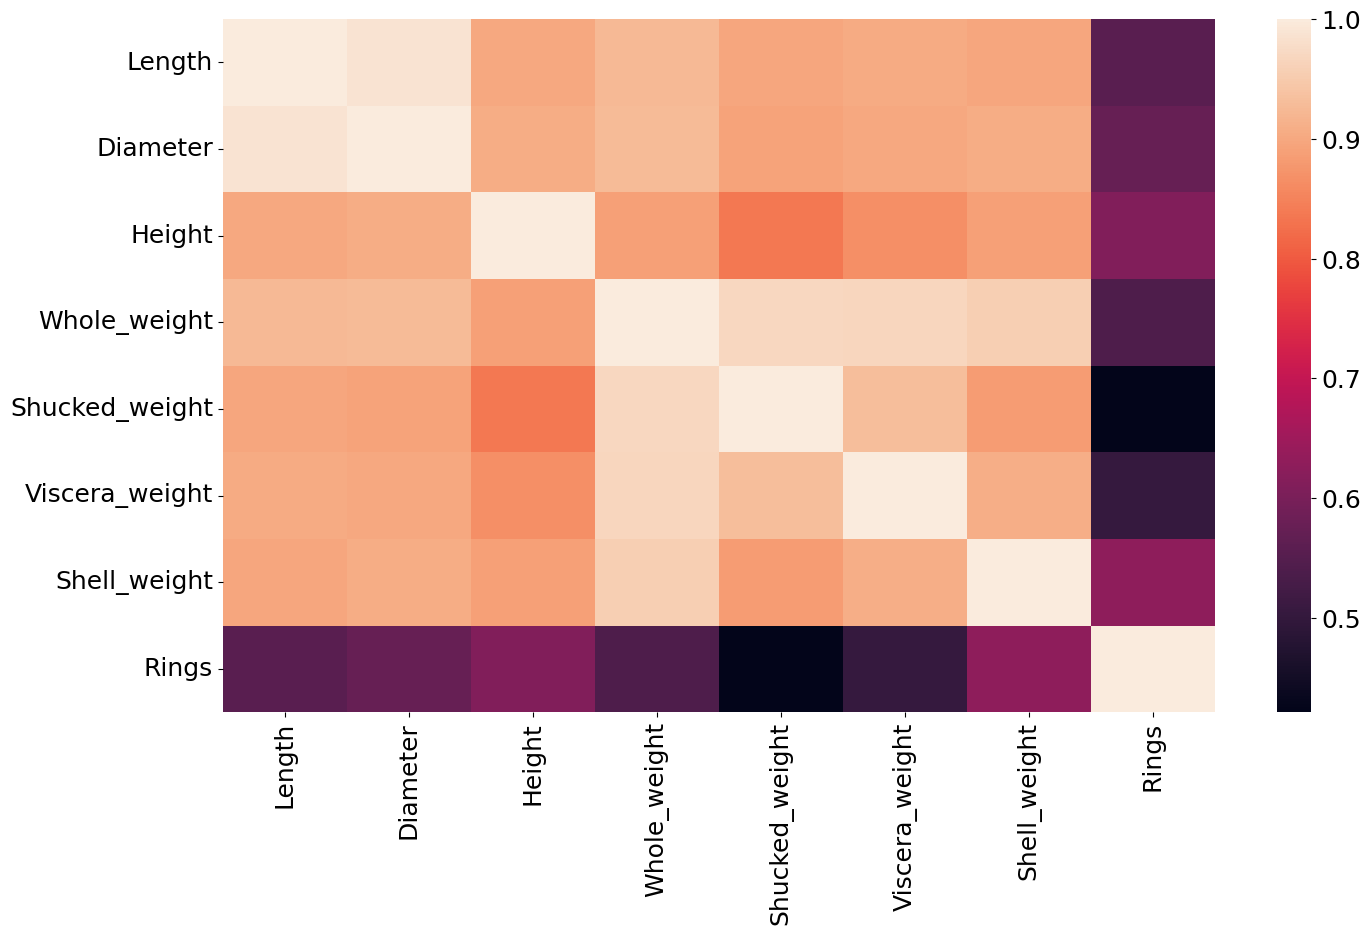

In [9]:
sns.heatmap(data=df.corr(numeric_only=True)) # Height, Shucked_weight - менее всего коррелируют
# Height, Shucked_weight - берем за факторы
# Whole_weight_class - берем за переменную отклика

In [10]:
df['Whole_weight_class'] = np.where(df.Whole_weight > 1, 'Over 1', 'Less 1')

In [11]:
X, y = df[['Height', 'Shucked_weight']].values, df['Whole_weight_class']

<h1>6. Формирование обучающей и тестовой выборки</h1>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)
df[['Height', 'Shucked_weight', 'Whole_weight_class']].head(5)

,Height,Shucked_weight,Whole_weight_class
0,0.095,0.2245,Less 1
1,0.090,0.0995,Less 1
2,0.135,0.2565,Less 1
3,0.125,0.2155,Less 1
4,0.080,0.0895,Less 1


In [13]:
print(f"Общий размер данных факторов: {X.shape}")
print(f"Общий размер данных переменной отклика: {y.shape}.")
print()
print(f"Размер тренировочных данных факторов: {X_train.shape}")
print(f"Размер тренировочных данных переменной отклика:{y_train.shape}")
print()
print(f"Размер тестовых данных факторов: {X_test.shape}")
print(f"Размер тестовых данных переменной отклика:{y_test.shape}")

# проверка на корректность разделения данных
assert X.shape[0] == X_train.shape[0] + X_test.shape[0]
assert y.shape[0] == y_train.shape[0] + y_test.shape[0]

Общий размер данных факторов: (4175, 2)
Общий размер данных переменной отклика: (4175,).

Размер тренировочных данных факторов: (2505, 2)
Размер тренировочных данных переменной отклика:(2505,)

Размер тестовых данных факторов: (1670, 2)
Размер тестовых данных переменной отклика:(1670,)


<h1>7. Визуализация данных</h1>

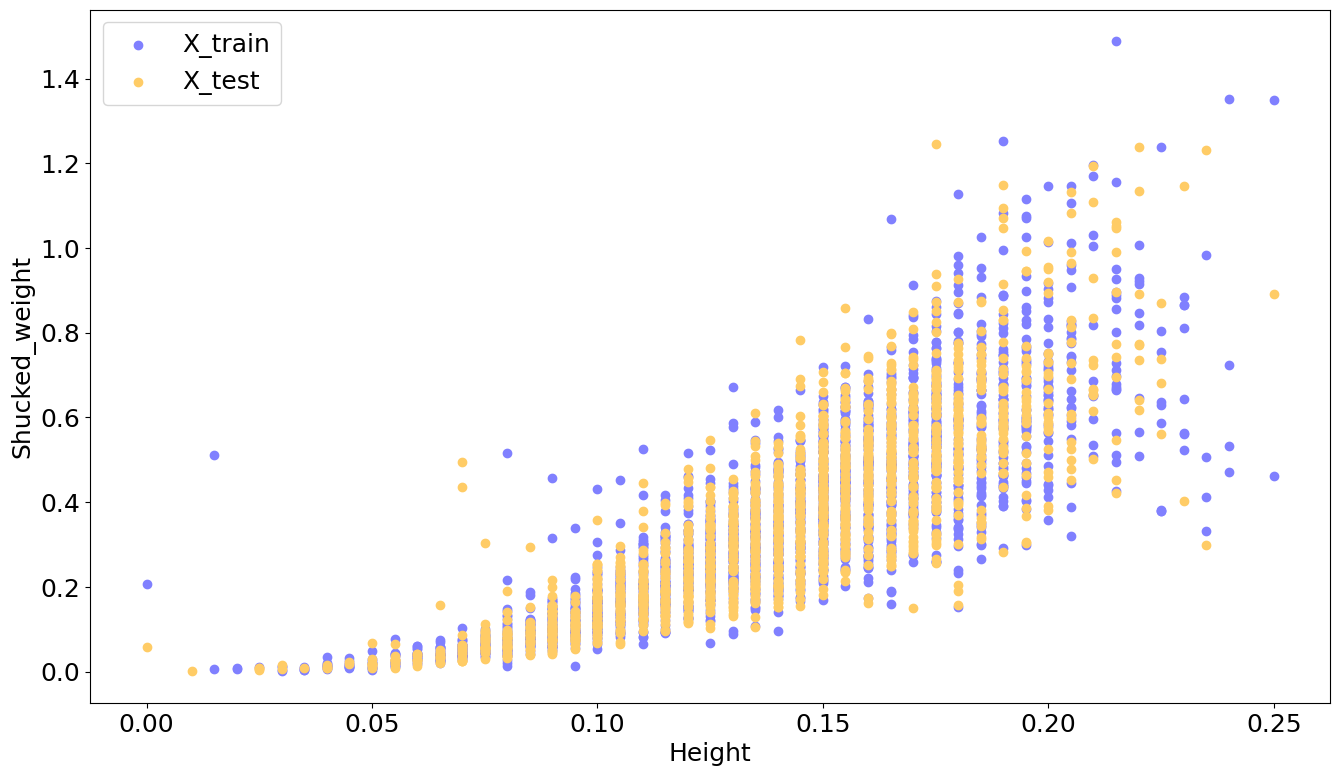

In [14]:
fig, ax = plt.subplots()
ax.scatter(pd.DataFrame(X_train)[0], pd.DataFrame(X_train)[1], label='X_train', c='#8080ff')
ax.scatter(pd.DataFrame(X_test)[0], pd.DataFrame(X_test)[1], label='X_test', c='#ffcc66')
ax.set_xlabel('Height')
ax.set_ylabel('Shucked_weight')
plt.legend(loc='upper left')

<Axes: xlabel='Height', ylabel='Shucked_weight'>

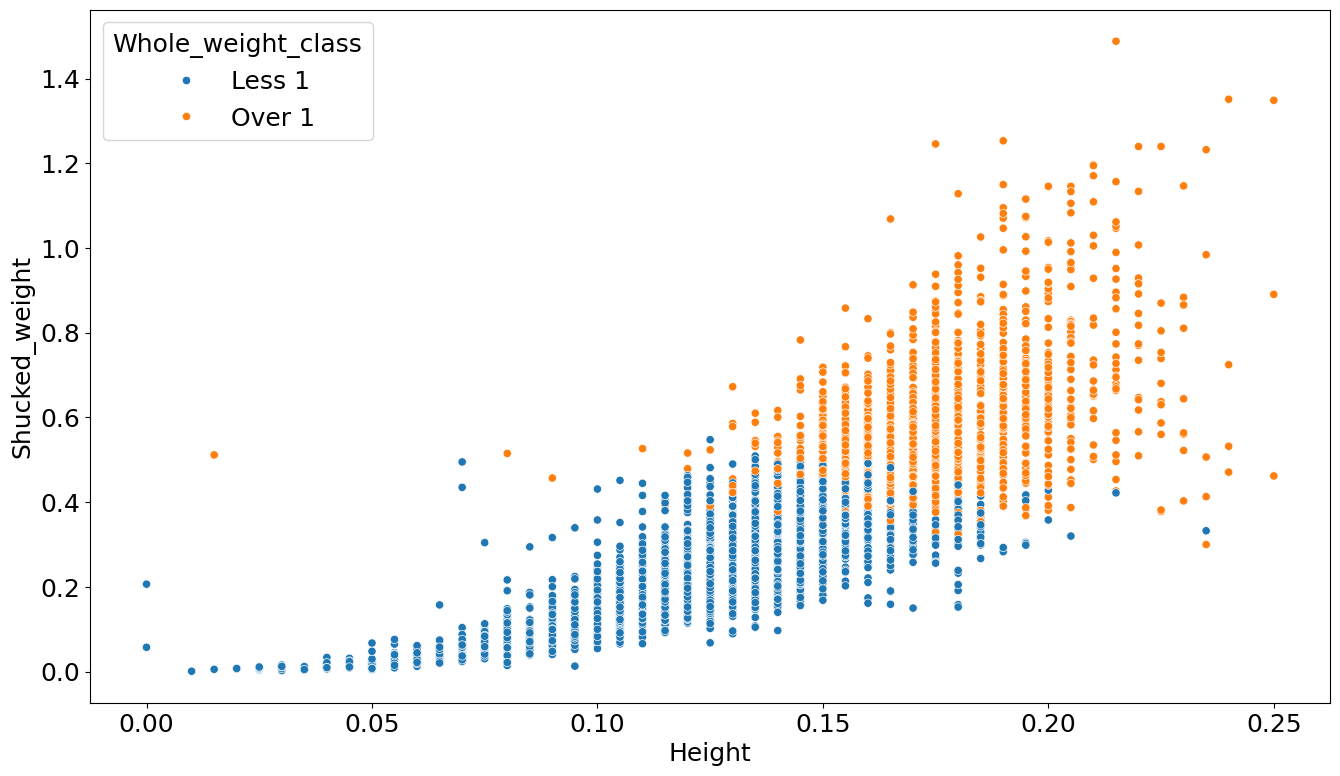

In [15]:
sns.scatterplot(data=df, x='Height', y='Shucked_weight', hue='Whole_weight_class')

<h1>8. KNN</h1>

In [16]:
KNN_model = KNeighborsClassifier(n_neighbors=30)
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

print(f'Количество неправильно отмеченных точек из общего числа точек: {X_test.shape[0], (y_test!=y_pred).sum()}')

              precision    recall  f1-score   support

      Less 1       0.97      0.95      0.96      1119
      Over 1       0.91      0.95      0.93       551

    accuracy                           0.95      1670
   macro avg       0.94      0.95      0.95      1670
weighted avg       0.95      0.95      0.95      1670

[[1067   52]
 [  28  523]]
Количество неправильно отмеченных точек из общего числа точек: (1670, 80)


<h1>9. Оценка точности</h1>
Построим кросс-валидационную таблицу и сделаем вывод о точности решения задачи классификации:

In [17]:
dat = {'y_Actual': y_test, 'y_Predicted': y_pred}
dff = pd.DataFrame(dat, columns=['y_Actual', 'y_Predicted'])
cross_table=pd.crosstab(dff['y_Actual'], dff['y_Predicted'],
                       rownames=['Actual'], colnames=['Predicted'], margins=True)
print(cross_table)

Predicted  Less 1  Over 1   All
Actual                         
Less 1       1067      28  1095
Over 1         52     523   575
All          1119     551  1670


In [18]:
round(1-80/1670,2)

0.95

Наша выборка состояла из 1670 объектов – 54 объекта первого класса, 1616 объектов второго класса.\
Модель допустила ошибки в 270 случаях из 1670, что соответствует точности прогноза в 84%. Таким образом, мы доспускаем, что наличие информации о очищенном весе и высоте морских ушков дает достаточно хорошую оценку о том, молодой молюск или старый.